In [1]:
import pandas as pd

df = pd.read_csv('Mall_Customers.csv')

df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [2]:
df = df.rename(columns={
    'Gender':'gender',
    'Age':'age',
    'Annual Income (k$)':'annual_income',
    'Spending Score (1-100)':'spending_score',
})

df.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df['gender'].replace(['Female','Male'],[0,1], inplace=True)

In [8]:
df.head()

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [10]:
from sklearn.cluster import KMeans

X = df.drop(['CustomerID', 'gender'], axis=1)

clusters = []

for i in range(1,11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

/Users/husnulnawafil/PycharmProjects/ML_pemula/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/husnulnawafil/PycharmProjects/ML_pemula/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/husnulnawafil/PycharmProjects/ML_pemula/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/husnulnawafil/PycharmProjects/ML_pemula/venv/lib/pytho

In [11]:
print(clusters)

[308812.77999999997, 212840.1698209719, 143342.751571706, 104366.15145556198, 75350.77917248776, 58300.44332159069, 51082.54296792137, 44346.912788790156, 40597.19297436766, 37072.5369658924]


/Users/husnulnawafil/PycharmProjects/ML_pemula/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/husnulnawafil/PycharmProjects/ML_pemula/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/husnulnawafil/PycharmProjects/ML_pemula/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/husnulnawafil/PycharmProjects/ML_pemula/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: F

Text(0, 0.5, 'Inertia')

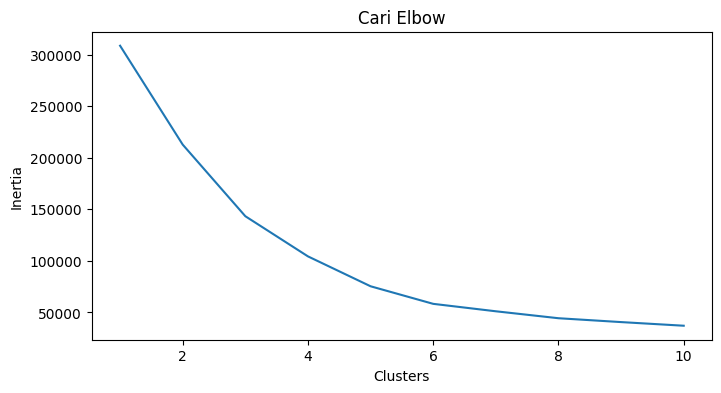

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
 
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

/Users/husnulnawafil/PycharmProjects/ML_pemula/venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/husnulnawafil/PycharmProjects/ML_pemula/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/husnulnawafil/PycharmProjects/ML_pemula/venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/husnulnawafil/PycharmProjects/ML_pemula/venv/lib/python3.11/site-packages/seaborn/_oldcore.p

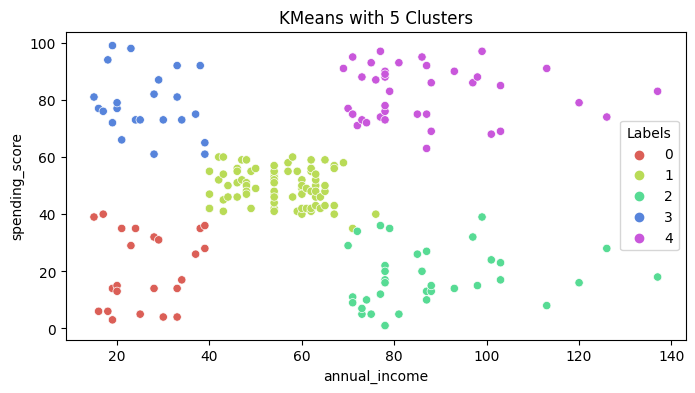

In [16]:
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_

plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()